In [32]:
'''
Reading the MNIST/USPS Handwritten Digits Dataset
'''
'''
Dependencies
'''
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import permutations, combinations_with_replacement
import copy

def readData(fname='ZipDigits.train'):
    '''
    Input:
        fname: name of file containing N examples, each with d attributes
    Output:
        X: N x d+1 numpy array
        y: N x 1 numpy array
    '''
    with open(fname) as f:
        X = []
        y = []
        rlines = f.readlines()
        for line in rlines:
            row = line.rstrip().split(' ')
            yval = int(float(row[0]))
            if yval == 1 or yval == 5:
              y.append(yval)
              xvals = [float(pixel) for pixel in row[1:]]
              X.append(xvals)
        X = np.array(X)
        y = np.array(y)
        y = y.reshape((y.shape[0], 1))
        print(f'X shape: {X.shape}')
        print(f'y shape: {y.shape}')
        return X, y

In [33]:
Xtrain, Ytrain = readData('ZipDigits.train')
Xtest, Ytest = readData('ZipDigits.test')

X shape: (1561, 256)
y shape: (1561, 1)
X shape: (424, 256)
y shape: (424, 1)


In [34]:
'''
Show images of handwritten digits
'''


def showKthImage(X, y, k):
    image = X[k, :].reshape((16, 16))
    plt.imshow(image, cmap='gray', vmin=-1, vmax=1)
    plt.title(f'digit is a {y[k, 0]}')
    plt.xlim(0, 15)
    plt.ylim(15, 0)
    plt.xticks(range(16))
    plt.yticks(range(16))
    plt.tight_layout()
    plt.show()

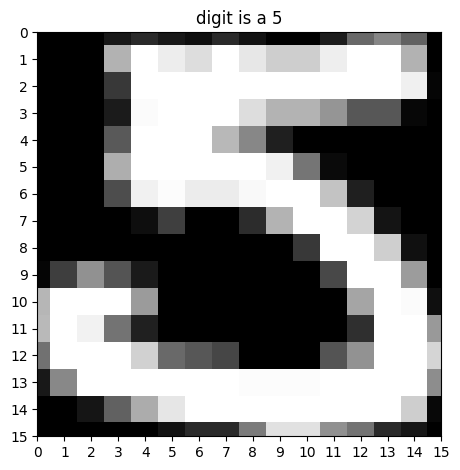

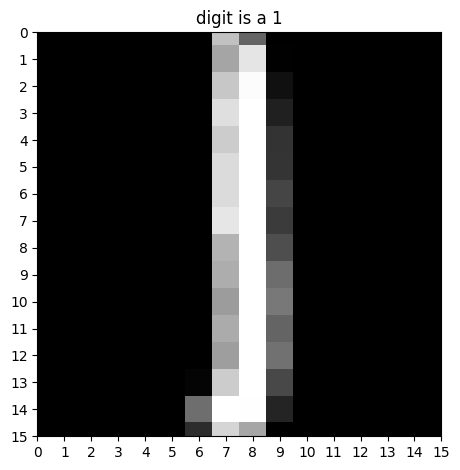

In [9]:
showKthImage(Xtrain, Ytrain, 0)
showKthImage(Xtrain, Ytrain, 1)

In [35]:
'''
Computing Features
'''


def computeIntensity(X):
    '''
    Compute the average intensity feature
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        intensities: a 2 dimensional N x 1 numpy array
                     each row consists of a single value representing the
                     average pixel intesity of the corresponding image
                     See LFD Example 3.1
    '''
    print('computing intensity feature')
    N, d = X.shape
    print(f'Input shape {N}, {d}')
    intensities = np.matmul(X, np.ones((d, 1)))/d
    print(f'Output shape {intensities.shape}')
    return intensities


def computeSymmetry(X):
    '''
    Compute the symmetry feature
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        symmetries: a 2 dimensional N x 1 numpy array
                     each row consists of a single value representing the
                     "horizontal" symmetry of the 16 x 16 image about the vertical axis
                     See LFD Example 3.1
    '''
    print('computing symmetry feature')
    N, d = X.shape
    print(f'Input shape {N}, {d}')
    Ximgs = [X[n, :].reshape((16, 16)) for n in range(N)]
    Ximgs_flipped = [np.flip(Ximgs[n], axis=1) for n in range(N)]
    symmetries = [np.sum(np.abs((Ximgs[n] - Ximgs_flipped[n])
                                ).reshape(256, ))/d for n in range(N)]
    symmetries = -np.array(symmetries)
    symmetries = symmetries.reshape(N, 1)
    print(f'Output shape {symmetries.shape}')
    return symmetries

In [36]:
'''
Computing the augmented feature matrix
'''


def computeAugmentedXWithFeatures(X):
    '''
    Compute the augmented feature matrix
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        Xaug: a 2 dimensional N x 3 numpy array
              the augmented feature matrix
              the i-th row corresponds to the i-th row of X (and image represented by it)
              the 0-th column is the column of 1s
              the 1-st column is the column of average intensities
              the 2-nd column is the column of horizontal symmetries
    '''
    N, d = X.shape
    intensity = computeIntensity(X)
    symmetry = computeSymmetry(X)
    dummy = np.ones((N, 1))
    Xaug = np.concatenate((dummy, intensity, symmetry), axis=1)
    print(f'Shape of augmented feature matrix: {Xaug.shape}')
    return Xaug

In [37]:
'''
Compute the augmented matrix with features
'''

print('Computing augmented training feature matrix')

Xaugtrain = computeAugmentedXWithFeatures(Xtrain)

Naugtrain, d = Xaugtrain.shape

print('Computing augmented test feature matrix')

Xaugtest = computeAugmentedXWithFeatures(Xtest)

Naugtest, d = Xaugtest.shape

Computing augmented training feature matrix
computing intensity feature
Input shape 1561, 256
Output shape (1561, 1)
computing symmetry feature
Input shape 1561, 256
Output shape (1561, 1)
Shape of augmented feature matrix: (1561, 3)
Computing augmented test feature matrix
computing intensity feature
Input shape 424, 256
Output shape (424, 1)
computing symmetry feature
Input shape 424, 256
Output shape (424, 1)
Shape of augmented feature matrix: (424, 3)


In [38]:
'''
Create the dataset wih digits 1 and 5
'''


def indexDigits(y):
    '''
    A helper function to locate examples by label
    Input:
        y: N x 1 2 dimensional numpy array; labels for handwritten digits
    Output:
        digit_idxs: a dictionary; the keys are digits 0 -- 9
                    for a digit k, digit_idxs[k] is a list identifying the rows labeled with digit k
    '''
    N = y.shape[0]
    digit_idxs = {}
    for n in range(N):
        digit = Ytrain[n, 0]
        if not digit in digit_idxs:
            digit_idxs[digit] = []
        digit_idxs[digit].append(n)
    return digit_idxs

In [39]:
'''
Construct the training and test sets for the rest of the exercises on classifying 1s vs 5s
'''

if True:
    digit_idxs_train = indexDigits(Xaugtrain)
    X1train = Xaugtrain[digit_idxs_train[1], :]
    print(X1train)
    N1train = X1train.shape[0]
    print(f'number of 1s: {N1train}')
    X5train = Xaugtrain[digit_idxs_train[5], :]
    print(X5train)
    N5train = X5train.shape[0]
    print(f'number of 5s: {N5train}')

    Xtrain = Xaugtrain[digit_idxs_train[1]+digit_idxs_train[5], :]
    ytrain = np.concatenate(
        (np.ones((N1train, 1)), -1*np.ones((N5train, 1))), axis=0)
    Ntrain, d = Xtrain.shape
    print(f'number of 1s and 5s: {Ntrain}')
    print(f'Xtrain shape: {Xtrain.shape}, ytrain shape: {ytrain.shape}')

[[ 1.         -0.75391406 -0.1174375 ]
 [ 1.         -0.77228125 -0.16229688]
 [ 1.         -0.76925781 -0.0595    ]
 ...
 [ 1.         -0.60979297 -0.21638281]
 [ 1.         -0.66230859 -0.09282031]
 [ 1.         -0.44755859 -0.13085156]]
number of 1s: 1005
[[ 1.         -0.11173828 -0.53372656]
 [ 1.         -0.56403516 -0.40299219]
 [ 1.         -0.392      -0.3865625 ]
 ...
 [ 1.         -0.26407812 -0.662     ]
 [ 1.         -0.28941406 -0.58520312]
 [ 1.         -0.53423828 -0.51378906]]
number of 5s: 556
number of 1s and 5s: 1561
Xtrain shape: (1561, 3), ytrain shape: (1561, 1)


In [40]:
'''
Construct the training and test sets for the rest of the exercises on classifying 1s vs 5s
'''

if True:
    digit_idxs_test = indexDigits(Xaugtest)
    X1test = Xaugtest[digit_idxs_test[1], :]
    print(X1test)
    N1test = X1test.shape[0]
    print(f'number of 1s: {N1test}')
    X5test = Xaugtest[digit_idxs_test[5], :]
    print(X5test)
    N5test = X5test.shape[0]
    print(f'number of 5s: {N5test}')

    Xtest = Xaugtest[digit_idxs_test[1]+digit_idxs_test[5], :]
    ytest = np.concatenate(
        (np.ones((N1test, 1)), -1*np.ones((N5test, 1))), axis=0)
    Ntest, d = Xtest.shape
    print(f'number of 1s and 5s: {Ntest}')
    print(f'Xtest shape: {Xtest.shape}, ytest shape: {ytest.shape}')


[[ 1.         -0.35032031 -0.7656875 ]
 [ 1.         -0.49764063 -0.3924375 ]
 [ 1.         -0.75078125 -0.0859375 ]
 [ 1.         -0.56176563 -0.11640625]
 [ 1.         -0.25580078 -0.75794531]
 [ 1.         -0.51044141 -0.17694531]
 [ 1.         -0.54045703 -0.31677344]
 [ 1.         -0.69753516 -0.03219531]
 [ 1.         -0.59622266 -0.13691406]
 [ 1.         -0.646625   -0.33245313]
 [ 1.         -0.41974609 -0.35819531]
 [ 1.         -0.38682422 -0.50897656]
 [ 1.         -0.61341406 -0.23557812]
 [ 1.         -0.71815234 -0.36572656]
 [ 1.         -0.59414453 -0.07711719]
 [ 1.         -0.29539453 -0.43547656]
 [ 1.         -0.66494531 -0.069625  ]
 [ 1.         -0.72013281 -0.10129687]
 [ 1.         -0.77421094 -0.06634375]
 [ 1.         -0.50392969 -0.53129688]
 [ 1.         -0.77693359 -0.32941406]
 [ 1.         -0.28723438 -0.57026562]
 [ 1.         -0.58141016 -0.08566406]
 [ 1.         -0.59074219 -0.162375  ]
 [ 1.         -0.56409375 -0.25682812]
 [ 1.         -0.75060938

In [41]:
if True:
    digit_idxs_test = indexDigits(Xaugtest)
    Xtest = Xaugtest[digit_idxs_test[1]+digit_idxs_test[5], :]
    ytest = np.concatenate((np.ones(
        (len(digit_idxs_test[1]), 1)), -1*np.ones((len(digit_idxs_test[5]), 1))), axis=0)
    Ntest, d = Xtest.shape
    print(f'number of 1s and 5s: {Ntest}')
    print(f'Xtest shape: {Xtest.shape}, ytest shape: {ytest.shape}')

number of 1s and 5s: 424
Xtest shape: (424, 3), ytest shape: (424, 1)


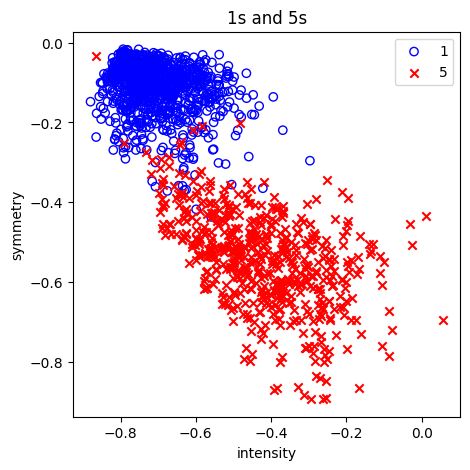

In [42]:
'''
Plot the training data
'''

if True:
    fig, axs = plt.subplots(figsize=(5, 5))
    axs.scatter(X1train[:, 1], X1train[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(X5train[:, 1], X5train[:, 2], marker='x', color='red', label='5')
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_title('1s and 5s')
    axs.legend()

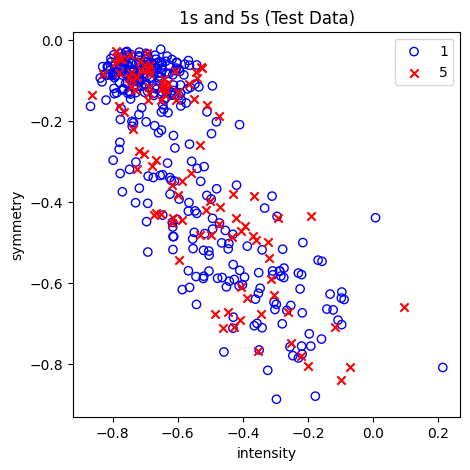

In [43]:
'''
Plot the test data
'''

if True:
    fig, axs = plt.subplots(figsize=(5, 5))
    axs.scatter(X1test[:, 1], X1test[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(X5test[:, 1], X5test[:, 2], marker='x', color='red', label='5')
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_title('1s and 5s (Test Data)')
    axs.legend()
    plt.show()


In [44]:
'''
Helper function to plot a linear separator
'''


def plotLinearSeparator(w, X, y, title='', Xs=None, Xlabels=None, markers=None):
    '''
    Plot data points a linear separator
    Input:
        w: a 2D (d+1) x 1 numpy array
        X: a 2D N x (d+1) numpy array
        y: a 2D N x 1 numpy array
        title: a string
    Output:
        error: misclassification error of hypothesis w on data points in X with true labels y
    '''
    '''
    Plot data points in X, y
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    fig, axs = plt.subplots(figsize=(5, 5))
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
                marker='x', color='red', label='5')
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_xlim(-1, 0.2)
    axs.set_ylim(-1, 0.1)
    '''
    Plot separator
    '''
    pltxs = np.linspace(-1, 0.21)
    pltys = - (w[0] + w[1] * pltxs) / w[2]
    axs.plot(pltxs, pltys, color='green', label='separator')
    axs.set_title(title)
    axs.legend()
    plt.show()

In [45]:
def predictClassLinear(w, X):
    '''
    Input:
        w: a 2D (d+1) x 1 numpy array of weights for a linear hypothesis
        X: a 2D N x (d+1) numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
    Output:
        yhat: an N x 1 2 dimensional numpy array orf predictions
    '''
    yhat = np.sign(np.matmul(X, w))
    return yhat

In [46]:
'''
Functions to compute the misclassification error
'''


def error(w, x, y, R=None):
    '''
    point-wise error measure for classification
    Input:
        w: a d x 1 2 dimensional numpy array
        x: a d x 1 2 dimensional numpy array
        y: a scalar value
        R: Risk weights; a dictionary
           whose keys are tuples (y, yhat) with
           value equal to the cost of predicting yhat when the label is y
    Output:
        error: misclassification error of hypothesis w on data point x with true label y
    '''
    '''
    TODO: Compute the error of the linear model with weights w on data point x with label y
    yhat = ?
    error = ?
    return error
    '''

    yhat = np.sign(np.dot(w.T, x))
    error = int(yhat != y)

    return error


def E(w, X, y, R=None):
    '''
    point-wise error measure for classification
    Input:
        w: a d x 1 2 dimensional numpy array
        X: an N x d 2 dimensional numpy array
        y: an N x 1 2 dimensional numpy array
        R: Risk weights; a dictionary
           whose keys are tuples (y, yhat) with
           value equal to the cost of predicting yhat when the label is y
    Output:
        error: misclassification error of hypothesis w on data points in X with true labels y
    '''
    N = X.shape[0]
    '''
    TODO: Compute the (average) misclassification error of the linear model with weights w
    on the data points in the data set X whose labels are in y
    yhat = ?
    error = ?
    return error
    '''
    total_error = 0
    for i in range(N):
        yhat = np.sign(np.dot(w.T, X[i]))
        error = int(yhat != y[i])
        total_error += error
    error = total_error / N

    return error

In [47]:
'''
The Pocket algorithm (variant of the Perceptron Learning Algorithm)
'''


def pocket(X, y, max_iters=1000, w_init=None):
    '''
    Implements the Pocket algorithm
    Input:
        X: a 2D N x (d+1) numpy array
           The i-th row X[i, :] contains features for the i-th example in the training set
           X[i, 0] = 1
           X[i, 1], ... X[i, d] have values of features
        y: a 2D N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        max_iters: an integer; maximum number of iterations of PLA
        w_init: a 2D (d+1) x 1 numpy array
                intended to set initial weights for PLA
    Output:
        w_best: a 2D (d+1) x 1 numpy array, weights with lowest error on the input training set X, y
    '''
    Eins = []
    ws = []

    Ein_best = np.infty
    w_best = 0

    w = np.zeros((d, 1))
    w = w + 0.0000001
    if not isinstance(w_init, type(None)):
        w = w_init

    for i in range(max_iters):
        Ein = E(w, X, y)
        Eins.append(Ein)
        ws.append(w)
        if Ein < Ein_best:
            Ein_best = Ein
            w_best = w
        yhat = np.sign(np.matmul(X, w))
        nstar = np.where(yhat != y)[0][0]
        xstar = X[nstar, :].reshape((d, 1))
        ystar = y[nstar, 0]
        w = w + ystar * xstar

    plt.scatter(range(max_iters), Eins)
    plt.xlabel('iteration')
    plt.ylabel('in sample error')
    plt.title('PLA')
    plt.tight_layout()
    plt.show()

    print(f'Ein_best {Ein_best}, \nw_best \n{w_best}')

    return w_best

<ipython-input-46-1a3cb46dc43c>:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error = int(yhat != y[i])


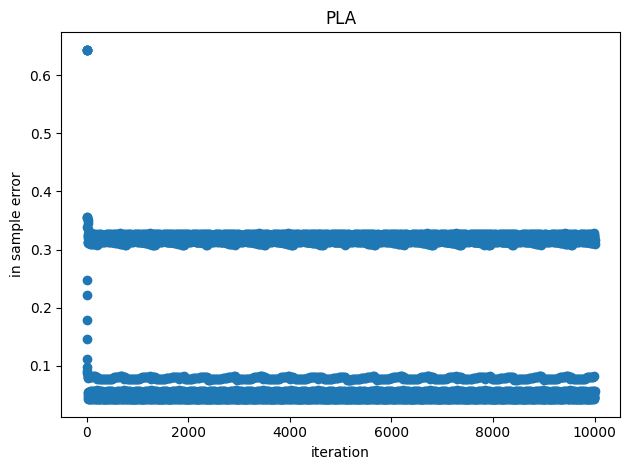

Ein_best 0.04228058936579116, 
w_best 
[[ 1.00000000e-07]
 [-2.11429287e+00]
 [ 2.92742979e+00]]


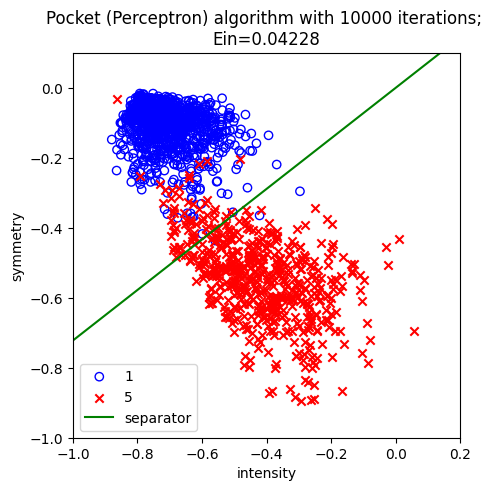

In [48]:
'''
Run the Pocket algorithm
'''

if True:
    max_iters = 10000
    w = pocket(Xtrain, ytrain, max_iters=max_iters)
    Ein = np.round(E(w, Xtrain, ytrain), 5)
    plotLinearSeparator(
        w, Xtrain, ytrain, title=f'Pocket (Perceptron) algorithm with {max_iters} iterations; \nEin={Ein}')

<ipython-input-46-1a3cb46dc43c>:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error = int(yhat != y[i])


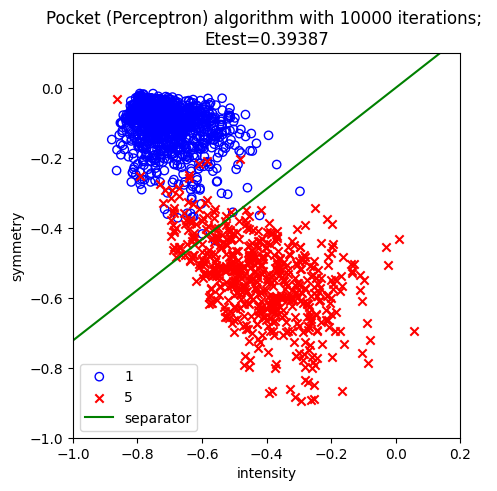

In [49]:
'''
Run the Pocket algorithm
'''

if True:
    max_iters = 10000
    w_best = np.array([[ 1.00000000e-07],[-2.11429287e+00],[ 2.92742979e+00]])
    Etest = np.round(E(w_best, Xtest, ytest), 5)
    plotLinearSeparator(
        w, Xtrain, ytrain, title=f'Pocket (Perceptron) algorithm with {max_iters} iterations; \nEtest={Etest}')



In [50]:
'''
The one-step optimal algorithm for Linear Regression
'''


def linearRegression(X, y):
    '''
    Implements the one-step algorithm for Linear Regression
    Input:
        X: A 2D N x (d+1) numpy array
           The i-th row X[i, :] contains features for the i-th example in the training set
           X[i, 0] = 1
           X[i, 1], ... X[i, d] have values of features
        y: A 2D N x (d+1) numpy array
           y[i, 0] is the label associated with the i-th example
    Output:
        w: weights with lowest error on the input training set X, y
    '''
    '''
    TODO: Compute the optimal weights which minimizes the sum of squared errors
    w_lin = ?
    '''
    w_lin = np.linalg.inv(X.T @ X) @ X.T @ y
    return w_lin

<ipython-input-46-1a3cb46dc43c>:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error = int(yhat != y[i])


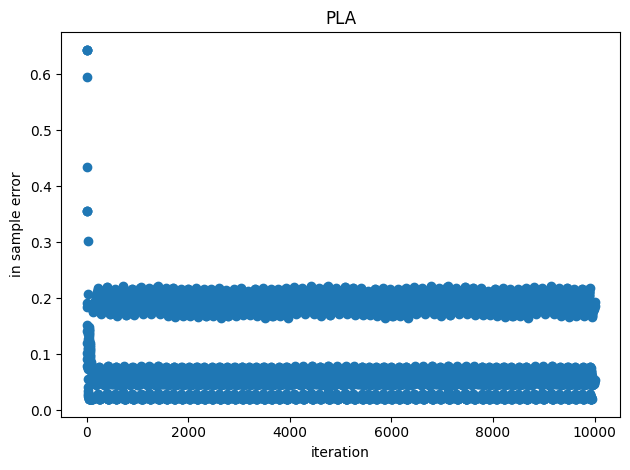

Ein_best 0.01985906470211403, 
w_best 
[[-0.08273323]
 [-2.76206372]
 [ 5.22501395]]


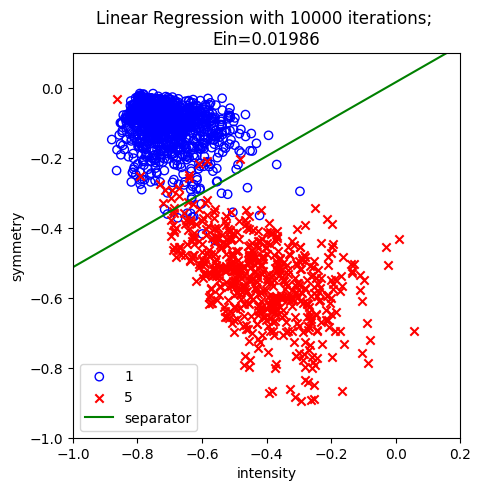

In [51]:
'''
Linear Regression for Classification:
Use Linear Regression to obtain an initial setting of the weights for the Pocket Algorithm
'''
w_lin = linearRegression(Xtrain, Ytrain)
if True:
    max_iters = 10000
    w = pocket(Xtrain, ytrain, w_init=w_lin, max_iters=max_iters)
    Ein = np.round(E(w, Xtrain, ytrain), 5)
    plotLinearSeparator(w, Xtrain, ytrain,
                        title=f'Linear Regression with {max_iters} iterations; \nEin={Ein}')

<ipython-input-46-1a3cb46dc43c>:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  error = int(yhat != y[i])


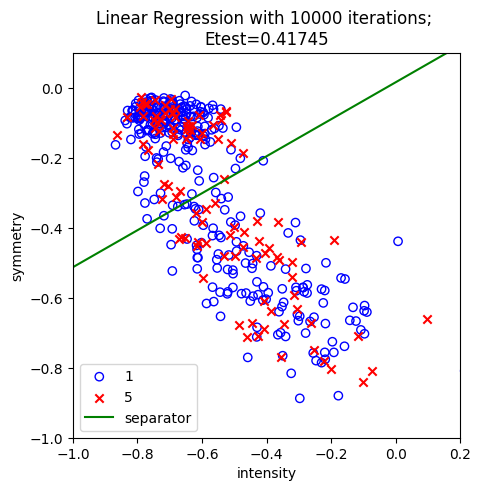

In [53]:
w_best = np.array([[-0.08273323],
 [-2.76206372],
 [ 5.22501395]])
Etest = np.round(E(w_best, Xtest, ytest), 5)
plotLinearSeparator(w_best, Xtest, ytest,
                        title=f'Linear Regression with {max_iters} iterations; \nEtest={Etest}')

------ Hypothesis set: h(x) = ax + b ------
Variance: 0.44700130683832195
Bias: 0.20676001376050293
Expected Out-of-Sample Error: 0.6540396605838071
Variance + Bias: 0.6537613205988249


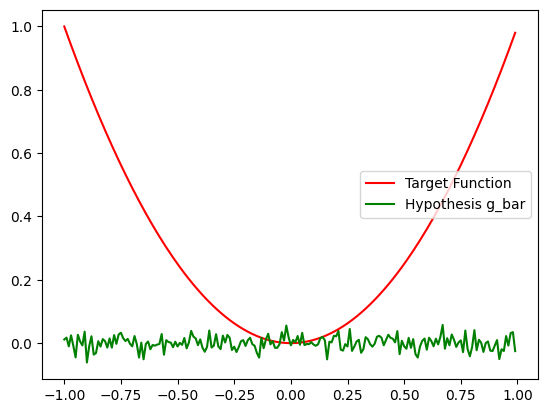

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linear_function(x, a, b):
    return a * x + b

def sample(lb, ub, sz):
    return lb + np.random.random_sample((sz,)) * (ub - lb)

def average_function_value(x, linear_func, num_samples, target_func):
    function_values = [linear_func(x, *sample(-1, 1, 2)) for _ in range(num_samples)]
    avg_func_value_at_x = np.mean(function_values)
    variance_func_value_at_x = np.var(function_values)
    bias_at_x = (avg_func_value_at_x - target_func(x))**2
    return avg_func_value_at_x, variance_func_value_at_x, bias_at_x

def calculate_bias_variance_eout(linear_func, target_func, num_data_samples, num_x_samples):
    variances, biases, eouts = [], [], []
    for _ in range(num_x_samples):
        x = sample(-1, 1, 1)[0]
        _, variance, bias = average_function_value(x, linear_func, num_data_samples, target_func)
        variances.append(variance)
        biases.append(bias)
        eout_on_data = [(linear_func(x, *sample(-1, 1, 2)) - target_func(x))**2
                        for _ in range(num_data_samples)]
        eouts.append(np.mean(eout_on_data))

    variance = np.mean(variances)
    bias = np.mean(biases)
    eout = np.mean(eouts)

    print('Variance:', variance)
    print('Bias:', bias)
    print('Expected Out-of-Sample Error:', eout)
    print('Variance + Bias:', variance + bias)

    xs = np.arange(-1, 1, 0.01)
    true_f, avg_f, var_f, ubs, lbs = [], [], [], [], []
    for x in xs:
        true_f.append(target_func(x))
        mean_f, var_f_value, _ = average_function_value(x, linear_func, num_data_samples, target_func)
        avg_f.append(mean_f)
        var_f.append(var_f_value)
        ubs.append(mean_f + np.sqrt(var_f_value))
        lbs.append(mean_f - np.sqrt(var_f_value))

    plt.plot(xs, true_f, color='red', label='Target Function')
    plt.plot(xs, avg_f, color='green', label='Hypothesis g_bar')
    plt.legend(['Target Function', 'Hypothesis g_bar'], loc='center right')
    plt.show()

num_data_samples = 1000
num_x_samples = 1000

print('------ Hypothesis set: h(x) = ax + b ------')
calculate_bias_variance_eout(linear_function, lambda x: x**2, num_data_samples, num_x_samples)


In [54]:
import numpy as np

Ein = 0.01986
Etest = 0.41745
N_Ein = 1561
N_Etest = 424
delta = 0.05

# Calculating bounds
Eout_bound_Ein = Ein + np.sqrt((1 / (2 * N_Ein)) * np.log(2 / delta))
Eout_bound_Etest = Etest + np.sqrt((1 / (2 * N_Etest)) * np.log(2 / delta))

print("Bound based on Ein:", Eout_bound_Ein)
print("Bound based on Etest:", Eout_bound_Etest)

Bound based on Ein: 0.054234056176496875
Bound based on Etest: 0.48340524009424174
